In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np#
import math

In [60]:
img = cv2.imread("noisy-lines.tif", cv2.IMREAD_GRAYSCALE)

print(img)

[[  0   0 255 ...   0 255 255]
 [  0 255 255 ...   0 255 255]
 [255 255 255 ...   0 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255   0]]


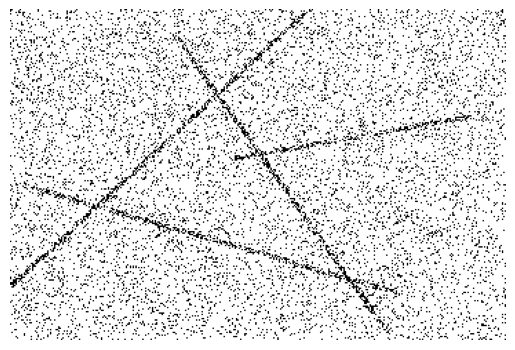

In [61]:

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


[[ 53  27  17 ...  93 106  96]
 [ 48  46  17 ...  38  38  29]
 [ 40  43  33 ...  38  29   0]
 ...
 [  0   0   0 ...  48  33  38]
 [  0   0   0 ...  33  41  51]
 [  0   0   0 ...  38  33  48]]


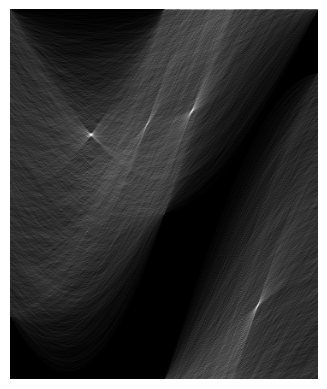

In [68]:
m = len(img)
n = len(img[0])
r_range = int(math.sqrt(m**2 + n**2)) + 1
theta_range = 360
accumulator = np.zeros((r_range, theta_range))
pixelcount = 0
for y in range(len(img)):
    for x in range(len(img[0])):
        if img[y][x] == 0:
            pixelcount += 1
            for k in range(theta_range):
                theta = k * (math.pi / theta_range)
                r_k = x * np.cos(theta) + y * np.sin(theta)
                accumulator[int(r_k)][k] += 1
                


max_val = np.max(accumulator)
div_accumulator = accumulator / max_val
norm_accumulator = 255 * div_accumulator
norm_accumulator = np.array(norm_accumulator, dtype=np.uint8)
print(norm_accumulator)


plt.imshow(norm_accumulator, cmap='gray')
plt.axis('off')
plt.show()


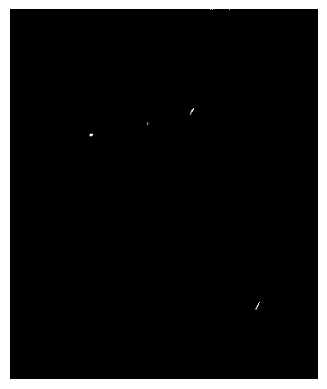

In [71]:
schwellwert = np.array([[255 if y > 180 else 0 for y in row] for row in norm_accumulator], dtype=np.uint8)
plt.imshow(schwellwert, cmap='gray')
plt.axis('off')
plt.show()

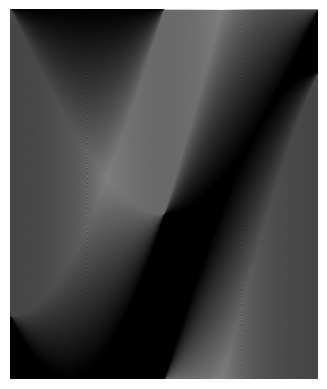

In [72]:
# Bias

bias = np.zeros((r_range, theta_range))
for y in range(len(img)):
    for x in range(len(img[0])):
        for k in range(theta_range):
            theta = k * (math.pi / theta_range)
            r_k = x * np.cos(theta) + y * np.sin(theta)
            bias[int(r_k)][k] += 1
                


max_val = np.max(bias)
div_bias = bias / max_val
norm_bias = 255 * div_bias
norm_bias = np.array(norm_bias, dtype=np.uint8)


plt.imshow(norm_bias, cmap='gray')
plt.axis('off')
plt.show()

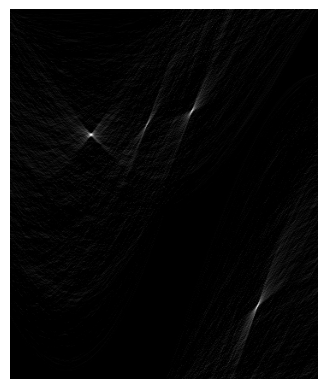

In [73]:
accumulator -= bias * pixelcount / (len(img)*len(img[0]))
accumulator = [[0 if y < 0 else y for y in row] for row in accumulator]


plt.imshow(accumulator, cmap='gray')
plt.axis('off')
plt.show()

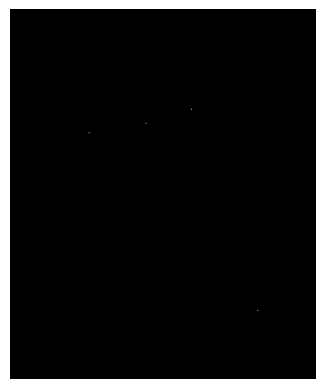

In [79]:
# lokale Maxima suchen mit Filter: Ist Mittelpunkt heller als alle 8 Nachbarn
threshold = 50
local_maxima = np.zeros((r_range - 10, theta_range - 10))
for y in range(5, len(accumulator) - 5):
    for x in range(5, len(accumulator[0]) - 5):
        if accumulator[y][x] >= threshold:
            isLocalMax = True
            for width in range(x - 5, x + 6):
                for height in range(y - 5, y + 6):
                    if accumulator[y][x] < accumulator[height][width]:
                        isLocalMax = False
                        break
                if not isLocalMax:
                    break
            if isLocalMax:
                local_maxima[y - 5][x - 5] = 255
            else:
                local_maxima[y - 5][x - 5] = 0

plt.imshow(local_maxima, cmap='gray')
plt.axis('off')
plt.show()
                    